# Indice del fatturato dei servizi

Here we are trying to reproduce this graph https://www.istat.it/it/congiuntura

In [ ]:
import sys

sys.path.append("../")

In [ ]:
from nbdev import *
from istatapi import *
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
%nbdev_hide
%reload_ext autoreload
%autoreload 2

In [ ]:
search_dataset("index")

,df_id,version,description,df_structure_id
17,114_191,1.2,Industrial new orders and turnover index,DCSC_ORDFATT
19,115_333,1.2,Industrial production index,DCSC_INDXPRODIND_1
20,115_362,1.2,Index of production in construction,DCSC_INDXPRODCOSTR_1
25,119_367,1.3,Indexes of turnover in other services,DCSC_FATTSERVIZ_1
26,120_337,1.2,Index of retail trade sales,DCSC_COMMDET_1
47,143_222,1.0,Import price index - monthly data,DCSC_PREIMPIND


In [ ]:
# initialize the dataset and get its dimensions
ds = DataSet(dataflow_identifier="119_367")
dimensions = ds.get_dimensions()
dimensions.head()

,dimension,dimension_ID,description
0,FREQ,CL_FREQ,Frequency
1,ATECO_2007,CL_ATECO_2007,Nace 2007
2,ADJUSTMENT,CL_CORREZ,Adjustment
3,ITTER107,CL_ITTER107,Territory
4,TIPO_DATO,CL_TIPO_DATO7,Data type 7


In [ ]:
dimension = "TIPO_DATO"
ds.get_dimension_values(dimension)

,values_ids,values_description
0,SERV_TURN_2,indexes of turnover in other services - base 2...
1,SERV_TURN_1,indexes of turnover in other services - base 2...
2,SERV_TURN,indexes of turnover in other services - base 2...


In [ ]:
ds.set_filters(ateco_2007=["0014", "J"], tipo_dato="SERV_TURN_2", adjustment="Y")
service_df = get_data(ds, filters=filters)
service_df.columns

.0014+J.Y..SERV_TURN_2
http://sdmx.istat.it/SDMXWS/rest/data/119_367/.0014+J.Y..SERV_TURN_2


Index(['DATAFLOW', 'FREQ', 'ATECO_2007', 'ADJUSTMENT', 'ITTER107', 'TIPO_DATO',
       'TIME_PERIOD', 'OBS_VALUE', 'BREAK', 'CONF_STATUS', 'OBS_PRE_BREAK',
       'OBS_STATUS', 'BASE_PER', 'UNIT_MEAS', 'UNIT_MULT', 'METADATA_EN',
       'METADATA_IT'],
      dtype='object')

In [ ]:
service_df.head()

,DATAFLOW,FREQ,ATECO_2007,ADJUSTMENT,ITTER107,TIPO_DATO,TIME_PERIOD,OBS_VALUE,BREAK,CONF_STATUS,OBS_PRE_BREAK,OBS_STATUS,BASE_PER,UNIT_MEAS,UNIT_MULT,METADATA_EN,METADATA_IT
78,IT1:119_367(1.3),Q,J,Y,IT,SERV_TURN_2,2000-01-01,100.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,IT1:119_367(1.3),Q,J,Y,IT,SERV_TURN_2,2000-04-01,99.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,IT1:119_367(1.3),Q,J,Y,IT,SERV_TURN_2,2000-07-01,100.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,IT1:119_367(1.3),Q,J,Y,IT,SERV_TURN_2,2000-10-01,102.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,IT1:119_367(1.3),Q,J,Y,IT,SERV_TURN_2,2001-01-01,101.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


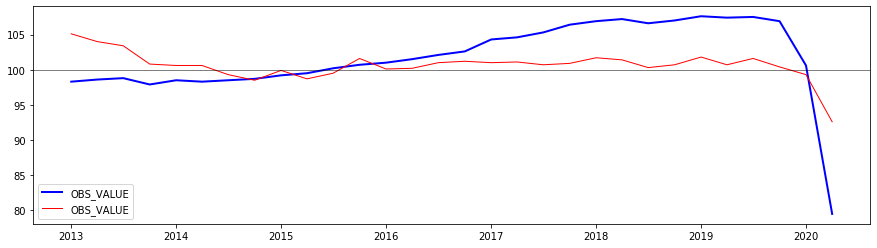

In [ ]:
# Plot
is_0014 = service_df["ATECO_2007"] == "0014"
is_J = service_df["ATECO_2007"] == "J"
after_2013 = service_df["TIME_PERIOD"] >= "2013"


plt.plot(
    "TIME_PERIOD",
    "OBS_VALUE",
    data=service_df[is_0014 & after_2013],
    marker="",
    color="blue",
    linewidth=2,
)
plt.plot(
    "TIME_PERIOD",
    "OBS_VALUE",
    data=service_df[is_J & after_2013],
    marker="",
    color="red",
    linewidth=1,
)
plt.axhline(y=100, color="black", linewidth=0.5, linestyle="-")
plt.legend()
plt.rcParams["figure.figsize"] = (15, 4)